<a href="https://colab.research.google.com/github/RedeemerNtumy/JCPennyConsultancyProject/blob/master/3549063_BD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# University of Stirling

# ITNPBD2 Representing and Manipulating Data

# Assignment Autumn 2025

# A Consultancy Job for JC Penney



### 1. BUSINESS UNDERSTANDING
JC Penney has provided data about products bought by their customers across their stores and the reviews of those who bought them. While there is no specific business goal to address, the goal of this project is conduct an exploratory data analysis to identify and quantify key strategic opportunities for JCPenney leadership.


### 2. DATA UNDERSTANDING

In [329]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import requests

In [330]:
# Loading products data first from csv
products = pd.read_csv("products.csv")

In [331]:
# Loading products data from json as well since it has extra features
# Setting Lines to true since each line in the json data is a json object
products_json = pd.read_json("jcpenney_products.json", lines= True)

In [332]:
# Loading users data
users = pd.read_csv("users.csv")

In [333]:
# Loading reviews data
reviews = pd.read_csv("reviews.csv")

Now that the data has been imported, I can now go ahead and explore the data

#### 2.1 Product Data Exploration

In [334]:
# Viewing the first 3 rows
products.head(3)

,Uniq_id,SKU,Name,Description,Price,Av_Score
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.000
2,013e320f2f2ec0cf5b3ff5418d688528,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625


In [335]:
# Creating this function to be used on all datasets
def data_summary(data_frame : pd.DataFrame) -> None :
  '''
  This function expects a Dataframe
  as an argument and prints out the:
  1. Information about the data
  2. Dimensions of the data
  3. Descriptive Statistics about the data
  '''
  print(data_frame.info())
  print(f" This data has {data_frame.shape[0]} rows and {data_frame.shape[1]} columns")
  print(data_frame.describe())

In [336]:
# Using my function on the products dataset to get information about it
data_summary(products)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7982 entries, 0 to 7981
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Uniq_id      7982 non-null   object 
 1   SKU          7915 non-null   object 
 2   Name         7982 non-null   object 
 3   Description  7439 non-null   object 
 4   Price        5816 non-null   float64
 5   Av_Score     7982 non-null   float64
dtypes: float64(2), object(4)
memory usage: 374.3+ KB
None
 This data has 7982 rows and 6 columns
              Price     Av_Score
count   5816.000000  7982.000000
mean     144.776618     2.988683
std      499.223719     0.911673
min      -65.270000     1.000000
25%       40.700000     2.500000
50%       58.010000     3.000000
75%       87.020000     3.500000
max    17122.170000     5.000000


#### 2.2 Users Data Exploration

In [337]:
# Viewing the first 3 rows
users.head(3)

,Username,DOB,State
0,bkpn1412,31.07.1983,Oregon
1,gqjs4414,27.07.1998,Massachusetts
2,eehe1434,08.08.1950,Idaho


In [338]:
# Reusing the function on the users dataset
data_summary(users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Username  5000 non-null   object
 1   DOB       5000 non-null   object
 2   State     5000 non-null   object
dtypes: object(3)
memory usage: 117.3+ KB
None
 This data has 5000 rows and 3 columns
        Username         DOB          State
count       5000        5000           5000
unique      4999          52             57
top     dqft3311  07.08.1953  Massachusetts
freq           2         112            107


#### 2.3 Reviews Data Exploration

In [339]:
# Viewing the first 3 rows
reviews.head(3)

,Uniq_id,Username,Score,Review
0,b6c0b6bea69c722939585baeac73c13d,fsdv4141,2,You never have to worry about the fit...Alfred...
1,b6c0b6bea69c722939585baeac73c13d,krpz1113,1,Good quality fabric. Perfect fit. Washed very ...
2,b6c0b6bea69c722939585baeac73c13d,mbmg3241,2,I do not normally wear pants or capris that ha...


In [340]:
# Reusing the function on the users dataset
data_summary(reviews)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Uniq_id   39063 non-null  object
 1   Username  39063 non-null  object
 2   Score     39063 non-null  int64 
 3   Review    39063 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB
None
 This data has 39063 rows and 4 columns
              Score
count  39063.000000
mean       1.487648
std        1.400332
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        5.000000


#### 2.4 Observations

Products Dataset:
- Contains 7,982 products with 6 columns
- Negative prices detected (minimum price is negative)
- Missing values found in SKU column

Users Dataset:
- Contains exactly 5000 reviews
- Massachusettes has the highest number of users
- DOB needs conversion to calculate customer age

Reviews Dataset:
- Contains 39063 reviews with 6 columns
- Links customers to products via Username and Uniq_id
- Can be merged with users and products for deeper analysis

### 3. DATA PREPARATION

In [341]:
# Creating a copy of the initial dataset for data intergrity
updated_products = products.copy()

In [342]:
# Finding the number of negative prices
len(updated_products[updated_products["Price"]<0])

44

In [343]:
updated_products["Price"] = abs(updated_products["Price"])
updated_products.describe() # Verifying that negative prices are removed

,Price,Av_Score
count,5816.000000,7982.000000
mean,145.424555,2.988683
std,499.035327,0.911673
min,8.010000,1.000000
25%,41.042500,2.500000
50%,58.010000,3.000000
75%,87.020000,3.500000
max,17122.170000,5.000000


In [344]:
# Checking for null values
updated_products.isna().sum()

,0
Uniq_id,0
SKU,67
Name,0
Description,543
Price,2166
Av_Score,0


In [345]:
"""
Filling all null SKU values with "MISSING_SKU"
Reason: Each product must have a unique SKU identifier
for grouping, analysis, and merging with other datasets.
Alternative approaches include:
  1. Dropping rows with missing SKUs : Not ideal since they
  contain real product info we can learn from.
  2. Imputing SKUs using related attributes such as product name or category :
  Has a higher level of complexity
  3. Flagging missing SKUs in a separate column for later review. : Since I have
  already tagged them as MISSING_SKU, I can always seperate them if I want to

"""
updated_products["SKU"] = updated_products["SKU"].fillna("MISSING_SKU")

While there are still some null values in other features. I would like to utilise other datasets before I finally decide whether I would work on these features

In [347]:
# Creating a copy since I plan on adding more features to the data
updated_users = users.copy()

In [348]:
# Convert the 'DOB' column to datetime objects.
#I did this because I want to get the age
updated_users['DOB'] = pd.to_datetime(updated_users['DOB'], format='%d.%m.%Y',
                                      errors='coerce')

In [349]:
# Calculate the current date
current_date = pd.to_datetime('today')

In [350]:
# Subtracting the birth year from the current year to get the estimated age
updated_users['Age'] = (current_date.year - updated_users['DOB'].dt.year)

In [351]:
# Adjusting age for birthdays that haven't happened yet this year
# Loops can be used but are less efficient
updated_users['Age'] = updated_users.apply(lambda row:
                  row['Age'] - ((current_date.month < row['DOB'].month) |
                  ((current_date.month == row['DOB'].month) &
                  (current_date.day < row['DOB'].day))) if pd.notna(row['DOB'])
                  else row['Age'], axis=1)

In [352]:
# Trying to obtain extra insights from the new column
updated_users["Age"].describe()

,Age
count,5000.000000
mean,49.761200
std,15.000146
min,24.000000
25%,37.000000
50%,50.000000
75%,63.000000
max,75.000000


Having similar mean and median values implies the age distribution is roughly symmetric with no strong skewness. I would later visualize this.

From the initial exploration, I realised
Massachusetts had the highest number of users.
This is suprising as JC Penney has customers
across all states with Massachusetts not being
the biggest state in the US.

This has led me to include population data of
every state in the US so I can compare against
their number of customers. This will allow me to see the branches and their customers relative to the population in the state

In [353]:
# Things could go wrong!
# I am using a try except block to handle edge cases
# If Conditions can be used but are less efficient
# Try and except also catches multiple issues that may not be factored in
# conditional statements
try:
    # Access to the API requires an API key
    with open("key.txt") as key:
        api_key = key.read()

    # Fetch population data from Census API. Most current year available is 2023
    api_url = f"https://api.census.gov/data/2023/pep/charv?get=POP&for=state:*&key={api_key}"

    response = requests.get(api_url)
    response.raise_for_status()

    data = response.json()
    population_df = pd.DataFrame(data[1:], columns=data[0])

    print("Successfully fetched US Census population data")

except Exception as e:
    print(f"Warning: Could not fetch Census data....Falling back to saved json")
    # The code below sets population_df to an already downloaded population data if the request fails
    population_df = pd.read_json("2023POP.json")
    #Set values in first line as column names
    population_df = pd.DataFrame(population_df.iloc[1:].values,
                                 columns=population_df.iloc[0])

Successfully fetched US Census population data


In [354]:
# Loading custom fip codes csv as the states
# from the external data are written with fip codes
usa_fips = pd.read_csv("us_states_fips.csv")

In [355]:
# This dataset maps a state to its Fip code
usa_fips.head(3)

,FIPS,State
0,1,Alabama
1,2,Alaska
2,4,Arizona


In [356]:
# Convert the column to numeric since it contains numbers
population_df['state'] = pd.to_numeric(population_df['state'])

In [357]:
# Merge population_df with usa_fips to add state names
merged_population_df = pd.merge(population_df, usa_fips, left_on='state',
                                right_on='FIPS', how='left')

In [358]:
# Drop the redundant FIPS column from the merged DataFrame
merged_population_df = merged_population_df.drop('state', axis=1)

In [359]:
"""
Keeping the higher estimate since population
in 2025 should have increased more than the higher
estimate of 2023
"""
latest_population_df = merged_population_df.iloc[1::2].reset_index(drop=True)
latest_population_df['POP'] = pd.to_numeric(latest_population_df['POP'])

In [360]:
# Merging users and reviews data for deeper analysis
merged_user_reviews = pd.merge(updated_users,
                               reviews, on='Username', how='inner')

In [361]:
# Defining age groups to help categorise certain habits

# Reason : The user data has an 'Age' range from 24 up to 75.
# We want bins of roughly 10 years, starting from the minimum age (24)
# to the maximum age (75).

age_bins = np.arange(min(updated_users['Age']),max(updated_users['Age'])+ 1,10)

# The current approach (age_bins[-1] += 2) is a manual adjustment to ensure
# the highest age (75) is included in the final bin,
# which originally ended at 74.
age_bins[-1] += 2

age_labels = ['24-34', '35-44', '45-54', '55-64', '65-75']

In [362]:
# Age_Group column specifies what group you fall under given your age
# Could have used np.select but pd.cut has a better readability and performance
merged_user_reviews['Age_Group'] = pd.cut(merged_user_reviews['Age'],
                                          bins=age_bins,
                                          labels=age_labels, right=False)

In [363]:
# Merge merged_user_reviews with updated_products to get product names
merged_data_with_names = pd.merge(merged_user_reviews,
                                  updated_products[['Uniq_id', 'Name']],
                                  on='Uniq_id', how='left')

In [364]:
# products json has information about product category which may prove useful
all_categories = [
    'Uncategorised' if (not c or pd.isna(c)) else c
    for category_list in products_json['category']
    for c in (
        category_list if isinstance(category_list, list)
        else [category_list] if isinstance(category_list, str)
        else [None]
    )
]

In [365]:
# Getting number of categories in dataset to inform how I can present it
category_counts = pd.Series(all_categories).value_counts()
print(f"There are {len(category_counts)} categories in the dataset")

There are 1169 categories in the dataset


### 4. DATA VISUALISATION

In [366]:
# This function would be used for most of my histogram graphs
def plot_top_distribution(data, title, xlabel, ylabel,
                          is_series=True, labels=None, values=None):
    """
    Plots a bar chart of the top items in a dataset.

    Parameters:
    - data: pandas Series or any data used for plotting
    - title: str, chart title
    - xlabel: str, label for the x-axis
    - ylabel: str, label for the y-axis
    - is_series: bool, True if 'data' is a pandas Series (default)
    - labels, values: lists or arrays, optional — used if is_series=False
    """
    plt.figure(figsize=(12, 6))

    if is_series:
        # Plot directly from a pandas Series
        data.plot(kind='bar')
    else:
        # Plot manually using labels and values
        plt.bar(labels, values)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()

#### 4.1 Top 10 products by SKU

In [367]:
# Get the counts for the top 10 SKUs
top_10_sku_counts = updated_products['SKU'].value_counts().nlargest(10)

In [368]:
# Replace SKU with the most frequent product name for plotting, keep 'MISSING_SKU'
# List comprehension more efficient compared to appending
# an empty list with a loop
plot_labels = [
    "MISSING_SKU" if sku == "MISSING_SKU"
    else updated_products[updated_products['SKU'] == sku]['Name'].value_counts().index[0]
    for sku in top_10_sku_counts.index
]

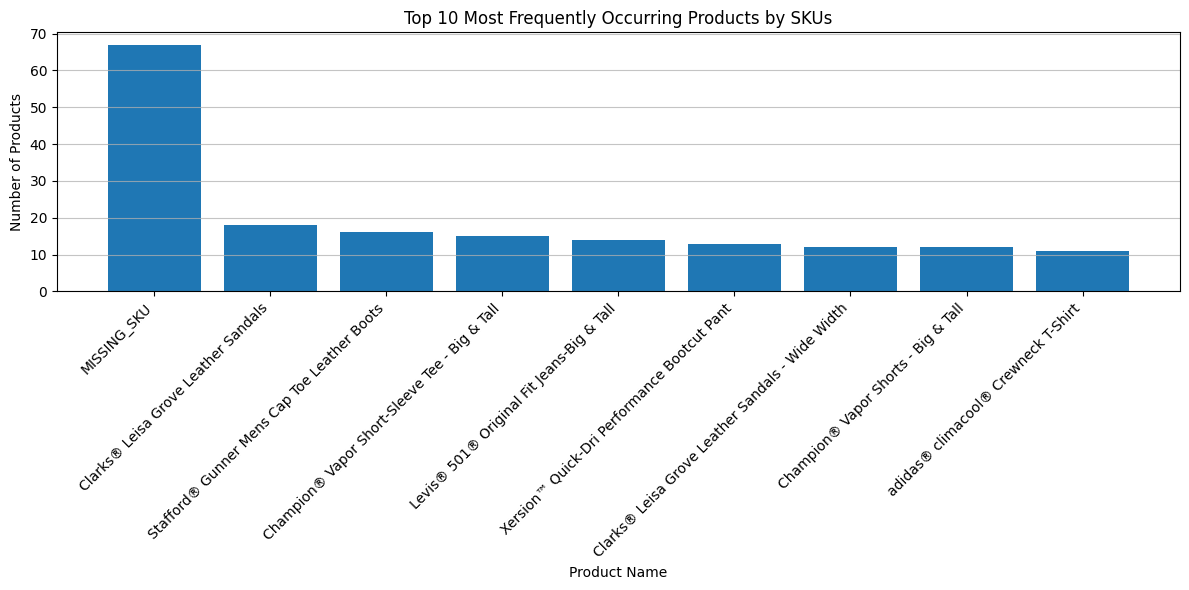

In [369]:
# Distribution of the top 10 most bought SKUs with product names
"""
A bar chart was used because it clearly displays the relative frequency
of product purchases across different SKUs. Since the goal was to identify which
products were bought most often, the bar chart’s categorical
layout allows for easy comparison of counts and highlights standout products at a glance.
"""
plot_top_distribution(
    data=None,
    title='Top 10 Most Frequently Occurring Products by SKUs',
    xlabel='Product Name',
    ylabel='Number of Products',
    is_series=False,
    labels=plot_labels,
    values=top_10_sku_counts.values
)


#### 4.2 Most Frequently bought products

In [370]:
# Get the counts for the top 10 products
top_10_product_name_counts = updated_products['Name'].value_counts().nlargest(10)

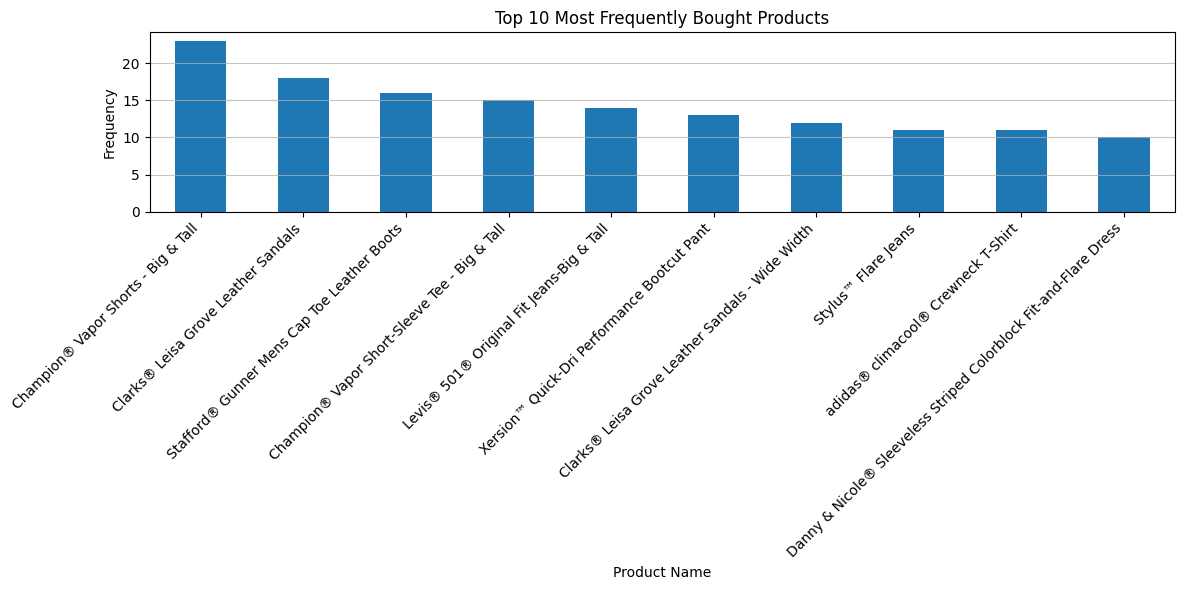

In [371]:
# Reusing the function on most bouguht products
plot_top_distribution(
    data=top_10_product_name_counts,
    title='Top 10 Most Frequently Bought Products',
    xlabel='Product Name',
    ylabel='Frequency'
)

#### 4.3 Top  Brands among the top selling products

In [372]:
# Get the counts for the top 10 products
top_10_products_df = updated_products[updated_products['Name'].isin(plot_labels)].copy()

In [373]:
# Merge with brand information
merged_top_products = pd.merge(
    top_10_products_df,
    products_json[['uniq_id', 'brand']],
    left_on='Uniq_id',
    right_on='uniq_id',
    how='left'
)

In [ ]:
# Count brand occurrences in top products
top_brand_counts = merged_top_products['brand'].value_counts()

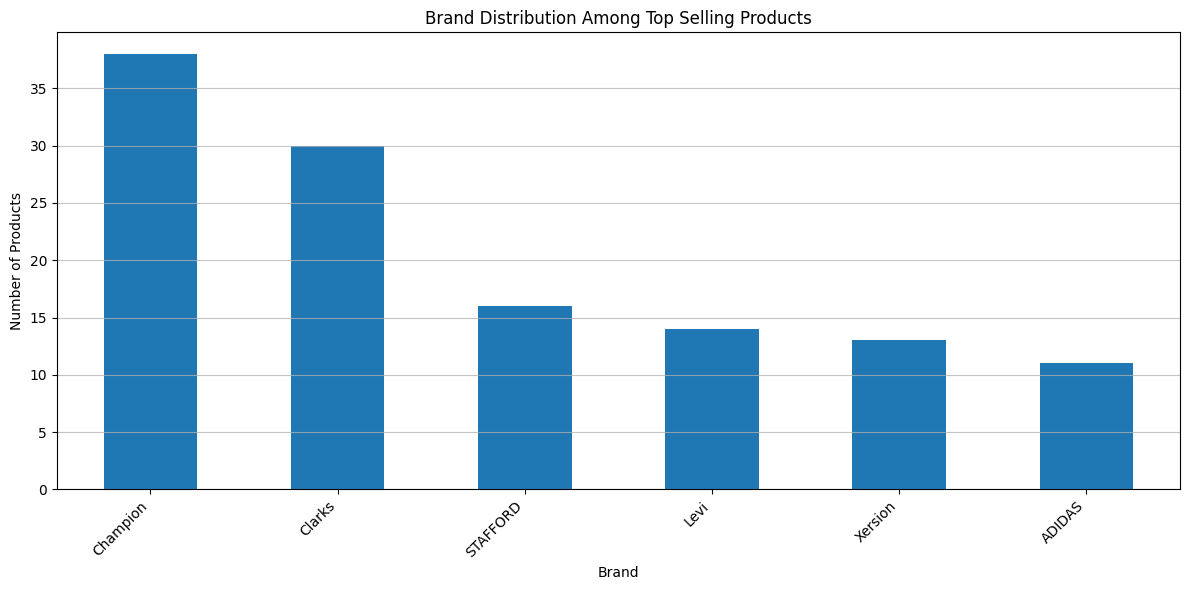

In [396]:
# Use plot_top_distribution to visualize the top brand counts
plot_top_distribution(
    data=top_brand_counts,
    title='Brand Distribution Among Top Selling Products',
    xlabel='Brand',
    ylabel='Number of Products'
)

#### 4.4 Geographic Distribution

In [375]:
# Want the number of people from each state that bought a product
state_counts = users['State'].value_counts()

In [376]:
# Importing extra libraries that would be needed
import plotly.express as px
import json

In [377]:
"""
I created this file myself after referring to
plotly's documentation that specified the need
for the abbreviations of each state in order to plot
"""
# Read the state abbreviation mapping from the JSON file
with open('state_abbrev.json', 'r') as f:
    state_abbrev = json.load(f)

In [378]:
# Mapping the full states names to the abbreviations
state_counts_df = state_counts.reset_index()
state_counts_df.columns = ['State', 'User_Count']
state_counts_df['State_Code'] = state_counts_df['State'].map(state_abbrev)

In [380]:
# These are territories that are not shown in the Official 50 state map
unmapped_states_list = ["Northern Mariana Islands", "Minor Outlying Islands", "American Samoa", "Guam", "U.S. Virgin Islands", "District of Columbia"]

In [381]:
# Filter the state_counts_df to create the 'unmapped' DataFrame based on the list
unmapped = state_counts_df[state_counts_df['State'].isin(unmapped_states_list)].copy()

In [382]:
# Plot the choropleth map of the US states. Unmapped will be excluded
mapped_states_df = state_counts_df[~state_counts_df['State'].isin(unmapped_states_list)].copy()

fig = px.choropleth(mapped_states_df,
                    locations='State_Code', # Column with state names
                    locationmode="USA-states",  # Set to plot US states
                    color='User_Count', # Column with the value to color by
                    scope="usa",  # Focus the map on the USA
                    color_continuous_scale="Viridis", # Colormap
                    title="Geographic Distribution of JCPenney Customers by State",
                    hover_name="State",  # Show full name on hover
                    hover_data={'State_Code': False, 'User_Count': True} # Display additional data on hover
                    )

fig.update_layout(
    title_x=0.5,
    geo_scope='usa', # Ensures just the map of USA shows
)

fig.show()

In [383]:
# Created another function for plotting histograms
def plot_histogram(
    data: pd.DataFrame,
    title: str,
    xlabel: str,
    ylabel: str,
    label_col: str,
    value_col: str,
    ) -> None:
    """
    Plots a bar chart of items and their corresponding values.

    Parameters
    ----------
    data : pd.DataFrame
        DataFrame containing the data to plot.
    title : str
        Title of the chart.
    xlabel : str
        Label for the x-axis.
    ylabel : str
        Label for the y-axis.
    label_col : str
        Column name to use for x-axis labels.
    value_col : str
        Column name to use for bar heights (y-axis values).

    Returns
    -------
    None
        Displays a bar chart.
    """
    plt.figure(figsize=(10, 6))
    plt.bar(data[label_col], data[value_col])

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout();

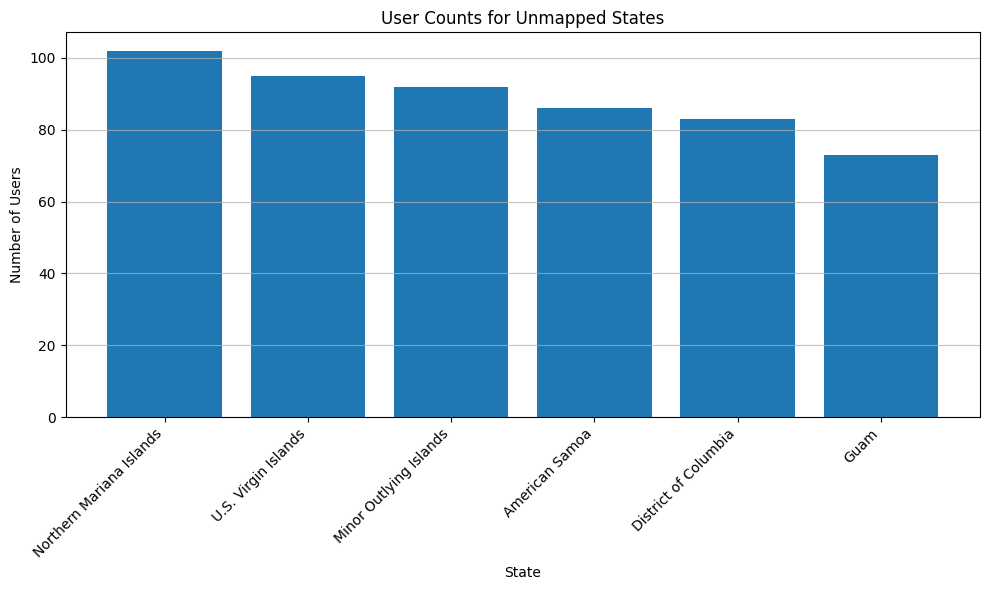

In [384]:
# Plotting the distribution of users in unmapped states
plot_histogram(
    data=unmapped,
    title='User Counts for Unmapped States',
    xlabel='State',
    ylabel='Number of Users',
    label_col='State',
    value_col='User_Count'
)

In [385]:
"""
As mentioned earlier, this insight can be misleading. With the
help of the population data, I can now calculate rate per population
"""
user_counts_by_state = updated_users['State'].value_counts().reset_index()
user_counts_by_state.columns = ['State', 'User_Count']
merged_population_users = pd.merge(user_counts_by_state, latest_population_df, on='State', how='inner')

In [386]:
""""
I used 10000 as the standardisation factor because it is a common
statistical convention for comparing rates across populations
of different sizes. It has allowed me to compare between states,
regardless of how large or small their populations are,
making it easy for me to identify where JC Penney has proportionally
higher market penetration
"""
merged_population_users['Rate_Per_10K'] = (merged_population_users['User_Count'] / merged_population_users['POP']) * 10000
merged_population_users['State_Code'] = merged_population_users['State'].map(state_abbrev)

In [388]:
# Create the choropleth map using plotly express
# US Minor Outlying Islands have no permanent residents so have been excluded
merged_population_users
fig = px.choropleth(merged_population_users,
                    locations='State_Code',
                    locationmode="USA-states",
                    color='Rate_Per_10K',
                    scope="usa",
                    color_continuous_scale="Viridis",
                    title="Geographic Distribution of JCPenney Customers by State (Rate per 10,000 Population)",
                    hover_name="State",
                    hover_data={'State':False, 'User_Count':True, 'POP':True, 'Rate_Per_10K':':.2f'}
                   )

fig.update_layout(
    title_x=0.5, # Center the title
    geo_scope='usa',  # Ensure the map is centered on the USA
)

fig.show()

In [389]:
"""
The Census Data provided only population for the 50 states. I had to manually
search for the population of the territories and create a json for it

"""
# Load population data for territories from the uploaded JSON file
try:
    with open('territories.json', 'r') as f:
        territories_population_data = json.load(f)
except FileNotFoundError:
    print("Error: 'territories.json' not found.")
    raise

territories_df = pd.DataFrame(territories_population_data)

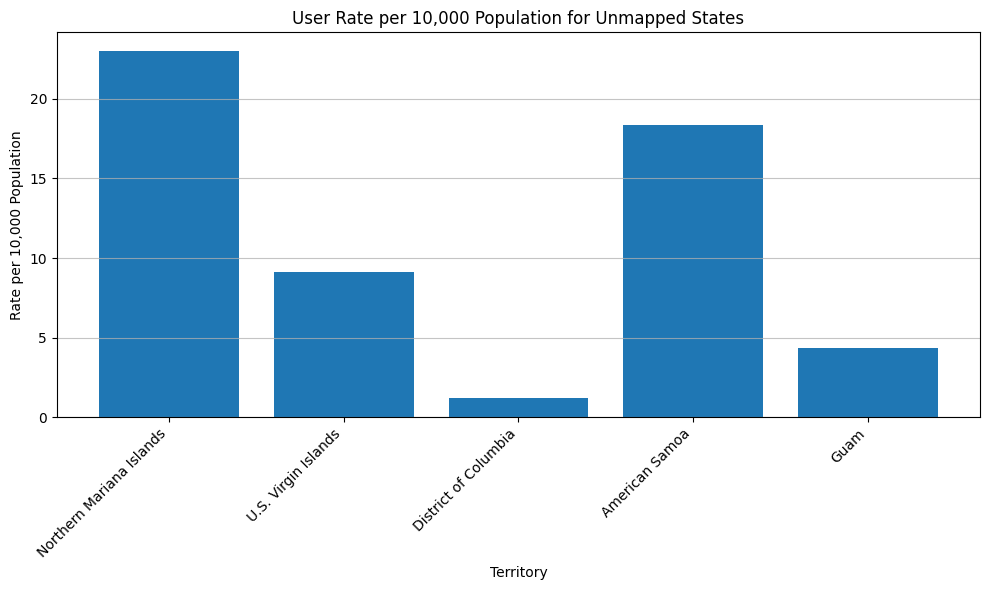

In [390]:
# Merge user counts with territory population data
merged_territories_data = pd.merge(territories_df, state_counts_df, on='State', how='inner')

# Calculate Rate_Per_10K for territories
merged_territories_data['Rate_Per_10K'] = (merged_territories_data['User_Count'] / merged_territories_data['population']) * 10000

# Plot a bar chart of the territories' Rate_Per_10K
plot_histogram(
    data=merged_territories_data,
    title='User Rate per 10,000 Population for Unmapped States',
    xlabel='Territory',
    ylabel='Rate per 10,000 Population',
    label_col='State',
    value_col='Rate_Per_10K'
)

#### 4.5 Customer Demographics

##### 4.5.1 Age Distribution

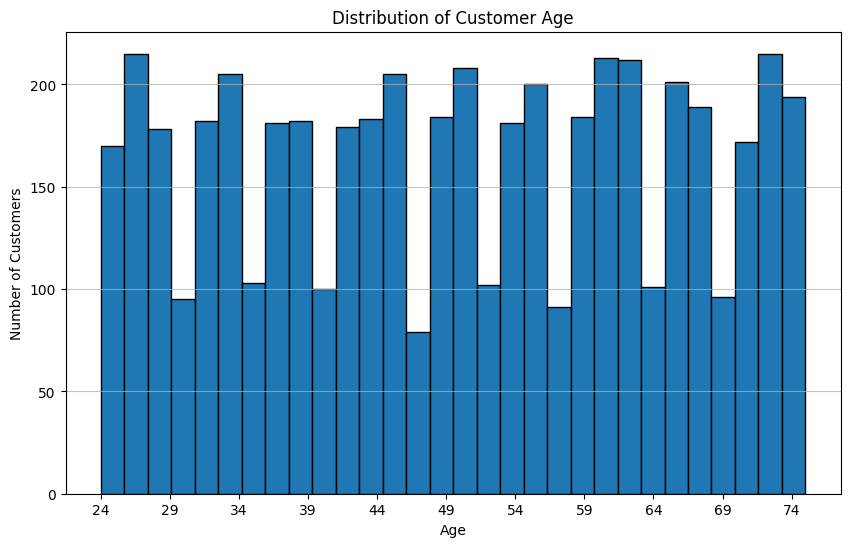

In [391]:
# Plot the Age Distribution of customers.
plt.figure(figsize=(10, 6))
plt.hist(updated_users['Age'], bins=30, edgecolor='black')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.75)

# Set x-axis ticks from 0 to 100 in steps of 10
plt.xticks(np.arange(min(updated_users["Age"]), max(updated_users["Age"]), 5));

##### 4.5.2 Age Group Preferences

In [392]:
# For the top 10 products, I want to know what age groups bought them
top_10_product_names = top_10_product_name_counts.index.tolist()

reviews_for_top_products = merged_data_with_names[
    merged_data_with_names['Name'].isin(top_10_product_names)
]

age_groups_by_product = reviews_for_top_products.groupby('Name')['Age_Group'].unique()

In [ ]:
# Import seaborn for plotting a heatmap
import seaborn as sns

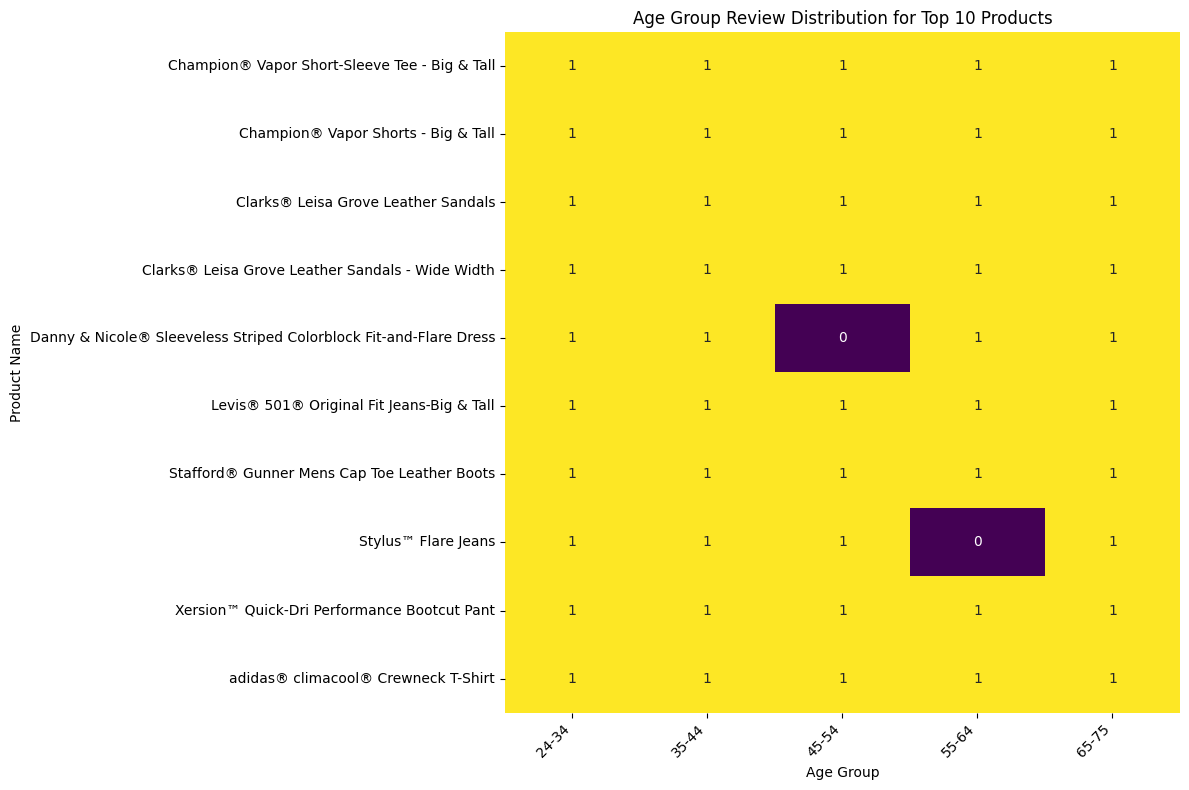

In [395]:
"""
age_groups_by_product is a Series where the index is the product
name and the values are lists of unique age groups that reviewed that product.

Heatmap is visually easy to understand in this context.
Alternative visualisations like bar charts would require a separate chart
for each age group combination, making comparison across the full matrix
much less intuitive and visually cluttered.

"""

# Create a list of all unique age groups that reviewed the top products
all_age_groups = sorted(list(set(group for groups_list in age_groups_by_product.values for group in groups_list)))

# Create a DataFrame to represent the presence of reviews for each product and age group
heatmap_data = pd.DataFrame(0, index=age_groups_by_product.index, columns=all_age_groups)

# Populate the heatmap_data DataFrame
for product, age_groups in age_groups_by_product.items():
    for age_group in age_groups:
        heatmap_data.loc[product, age_group] = 1 # 1 to indicate presence of a review

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='d', cbar=False)
plt.title('Age Group Distribution for Top 10 Products')
plt.xlabel('Age Group')
plt.ylabel('Product Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 4.6 Top Categories

In [394]:
"""
I chose the treemap because it is simpler to view this proportion
A piechart can be used but it becomes cluttered and hard to compare slices
especially for this scenario where there are 20 data sources.

A bar chart can also be used but the treemap provides better visualisation
"""

# Create a DataFrame from the top 20 categories Series for Plotly
top_20_categories_df = category_counts.head(20).reset_index()
top_20_categories_df.columns = ['Category', 'Count']

# Create the treemap
fig = px.treemap(top_20_categories_df,
                 path=['Category'],
                 values='Count',
                 title='Top 20 Most Frequently Occurring Categories by Size')

fig.update_layout(title_x=0.5)

fig.show()